## I numeri di Almalibri

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from PIL import Image
from IPython.display import Image
from IPython.display import HTML, display
import matplotlib.pyplot as plt
%matplotlib inline

Il file "editori.csv" è il risultato della query che richiama l'elenco degli editori e il numero di titoli citati nelle bibliografie.

In [2]:
df = pd.read_csv('editori.csv', 
                 names=['Editore', 'Frequenza'], header=0, skiprows=[1])

Ampiezza del catalogo dei libri adottati

In [3]:
df.Frequenza.sum()

100224

Il numero degli editori presenti nel catalogo

In [4]:
df.count()

Editore      7629
Frequenza    7629
dtype: int64

# Numero docenti e numero insegnamenti 

La query è stata lanciata nel backend. 
1. Insegnamenti singoli, ovvero contati solo una volta indipendentemente dai curricula/piani di studio in cui sono inseriti 
2. Un insegnamento può essere inserito in più corsi di laurea e in questo caso può essere contato più di una volta perché non è detto che adotti lo stesso programma nei vari corsi di laurea
3. Ci sono materie prive per definizione di programma e bibliografia. Es: TIROCINIO, TESI DI LAUREA, ecc.
4. I docenti sono stati contati per università e nome (in modo da evitare omonimie, sperando che nella stessa università non ci siano due docenti con lo stesso nome)
5. Se un docente ha più insegnamenti, come accade di sovente, è stato contato una volta sola  

ROARS riporta per il 2018, 44844 docenti tra ordinari, associati e ricercatori. A questi si devono aggiungere 31587 docenti a contratto.

In [5]:
from IPython.display import HTML, display

data = [[2018,85387,70155,66473],
        [2019,96490,78752,76606],
        [2020,107720,81665,79954],
        ['Totali', 289597,230572,223033]
        ]
data2 = [[2018,33727,9442,43169],
        [2019,38399,12039,50438],
        [2020,39304,11091,50395],
        ['Totali',111430,32572,144002]]

display(HTML(
   '<table><tr><th>&nbsp;</th><th>Insegnamenti</th><th>Con programma</th><th>Con bibliografia</th><tr>{}</tr></table>'.format(
       '</tr><tr>'.join(
           '<td>{}</td>'.format('</td><td>'.join(str(_) for _ in row)) for row in data)
       )
),
    HTML(
   '<br /><table><tr><th>&nbsp;</th><th>Docenti</th><th>Sub docenti</th><th>Totali</th><tr>{}</tr></table>'.format(
       '</tr><tr>'.join(
           '<td>{}</td>'.format('</td><td>'.join(str(_) for _ in row)) for row in data2)
       )
)
       )

,Insegnamenti,Con programma,Con bibliografia
2018,85387,70155,66473
2019,96490,78752,76606
2020,107720,81665,79954
Totali,289597,230572,223033


,Docenti,Sub docenti,Totali
2018,33727,9442,43169
2019,38399,12039,50438
2020,39304,11091,50395
Totali,111430,32572,144002


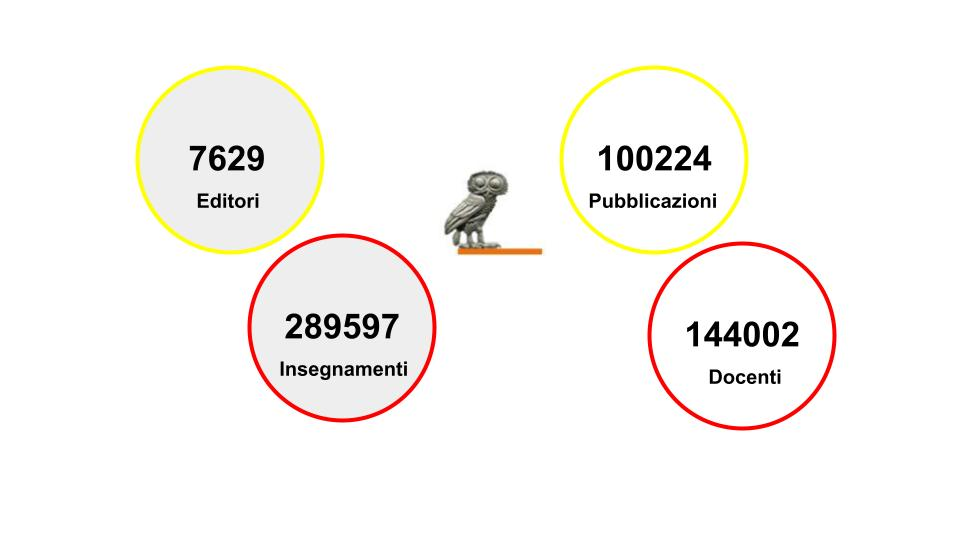

In [6]:
Image(filename='almalibri-dati.jpg')

Un esempio di ricerca di adozioni per l'area 14 Scienze politiche e sociali, SSD Storia delle relazioni internazionali, per qualunque tipo di laurea. Il file csv è scaricabile direttamente da https://www.almalibri.it/ricerca/adozioni/ dopo aver effettuato la ricerca.

In [7]:
ad = pd.read_csv('A14_SPS-06.csv', sep=";")

Eliminiamo i campi che non ci interessano.

In [8]:
to_drop = ['laurea_tipo', 'a_a', 'laurea_classe_cod', 'curr_nome', 
           'curr_materia_anno', 'curr_materia_periodo', 'modulo_nome', 'sub_modulo_gruppo', 
           'sub_modulo_nome', 'modulo_cfu', 'modulo_periodo', 'materia_ssd_cod', 'insegnamento_prof_www',
          'traduttori', 'lingua', 'testo_uso', 'testo_freq', 'edizione', 'laurea_nome']
ad_simple = ad.drop(to_drop, axis=1)

Raggruppiamo ora le adozioni per singolo editore

In [9]:
ad2 = ad_simple[['materia_nome','editore']].groupby(['editore'])['materia_nome'].count()\
                                .reset_index(name='numero adozioni')\
                                .sort_values('numero adozioni', ascending=False)

Disegnamo un grafico a barre con la numerosità delle adozioni; per adozioni, come è usuale, distinguiamo tutti i corsi con curricula, moduli, ecc. I dati sono ordinati per numero di adozioni e prendiamo i primi 50 editori dei 145 presenti.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <a list of 50 Text xticklabel objects>)

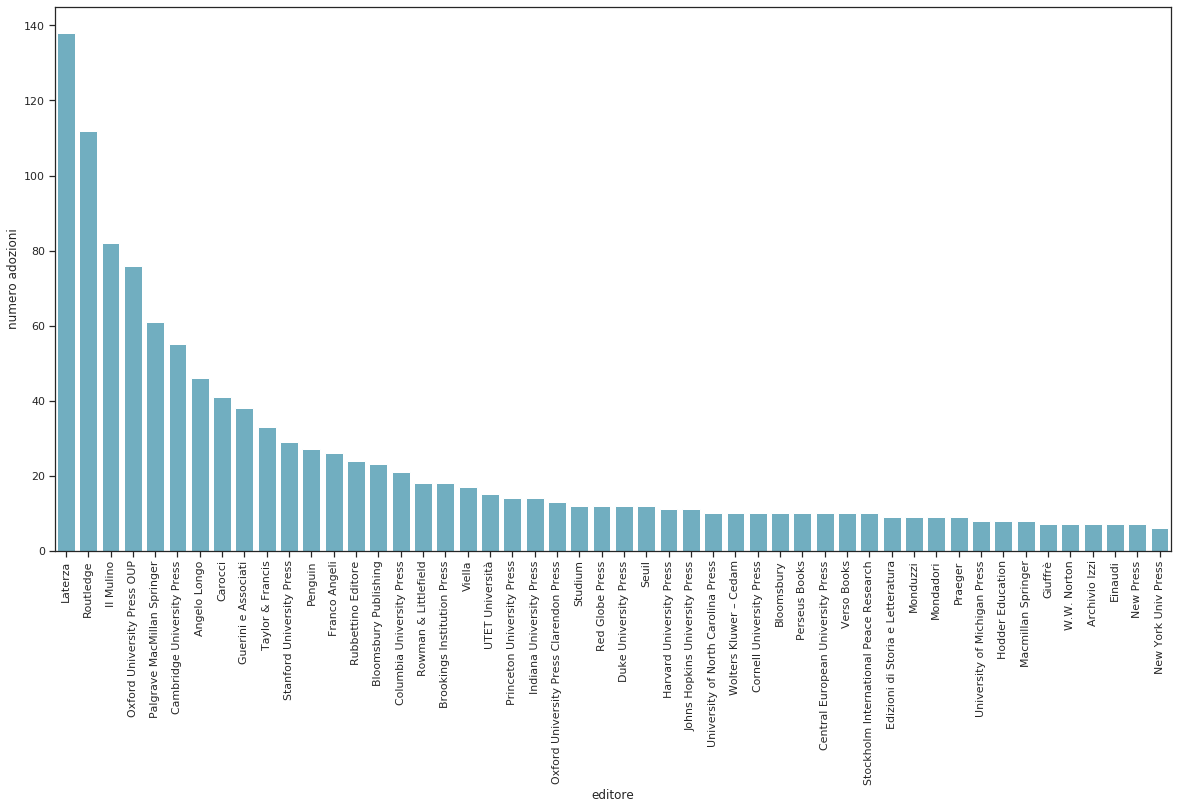

In [10]:
plt.figure(figsize=(20,10))
sns.set_theme(style="ticks", color_codes=True)
sns.barplot(x="editore", y='numero adozioni', data=ad2.head(50), color="c")
plt.xticks(rotation=90)

Questa tabella ci mostra un'anomalia da tenere in considereazione utilizzando Almalibri. Facendo la ricerca delle adozioni per editore su almalibri.it per l'editore Alberto Longo risultano solo 15 adozioni e non 46. **La ricerca sul sito infatti presenta solo un "riassunto" e non riporta le suddivisione per curricula, come invece avviene sui dati completi scaricati in formato testo.**

In [12]:
# numero di righe associate all'editore cercato
ad[ad['editore']=='Angelo Longo']['isbn'].count()

46

Facciamo un passo avanti e associamo ora l'insegnamento all'editore e al numero di adozioni

In [13]:
ad3 = ad[['materia_nome','editore']].groupby(['editore', 'materia_nome'])['materia_nome'].count()\
    .reset_index(name='numero adozioni').sort_values('editore')

In [15]:
def display_table(data):
    html = "<table><tr><th>Editore</th><th>&nbsp;</th><th style=\"text-align=right\">Insegnamento</th><th>&nbsp;</th><th>Numero adozioni</th></tr>"
    for row in data:
        html += "<tr>"
        for field in row:
            html += "<td>%s<td>"%(field)
        html += "</tr>"
    html += "</table>"
    display(HTML(html))
display_table(ad3.values)

Editore,,Insegnamento,,Numero adozioni
